# Logistic Regression Using Regulation

In this notebook I'm going to introduce the concept of regularization and apply it to logistic regression.

Regularization is very known in machine learning to reduce overfitting by reducing the impact of the high order parameters. To see that let's rebuild the logistic regression algorithm using regularization.

First, let's import the libraries we will need.

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import numpy

In this exercise, I will implement the regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

If I have the test results for some microchips on two different tests. From these two tests, I would like to determine whether the microchips should be accepted or rejected. 

Let's load the dataset and split the data into features and labels

In [2]:
filename = 'ex2data2.csv'
names = ['Test1','Test2','Class']
Dataset = read_csv(filename, names = names)

array = Dataset.values

X_ = array[:,:-1]
Score_1 = array[:,0]
Score_2 = array[:,1]
Y_ = array[:,-1]
Y = array[:,-1].reshape(len(Y_),1)
X = numpy.c_[numpy.ones(len(Y)),X_]

Let's plot the dataset to see how it looks like

In [3]:
def plotData():
	for i in range(len(Y)):
		if Y[i] == 0:
			y0 = pyplot.scatter(Score_1[i],Score_2[i], color = 'red', marker='o')
		else:
			y1 = pyplot.scatter(Score_1[i],Score_2[i], color = 'blue', marker='+')
	pyplot.xlabel("Test 1 Score")
	pyplot.ylabel("Test 2 Score")
	pyplot.title("Microships Classification based on Test scores")
	pyplot.legend((y0,y1),('Rejected','Accepted'))

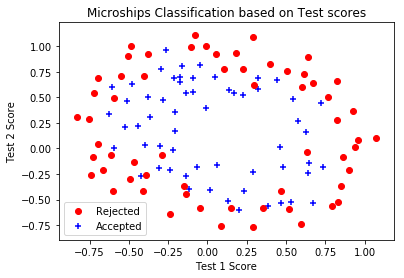

In [4]:
plotData()
pyplot.show()

As we can see, clearly th data cannot be seperated with line. So the seperator needs to have a higher order shape to be able to seperate the data.

Let's choose order 6, so the equation will have order 6 terms like $x_1^6, x_1 x_2^5, x_1^2 x_2^4 ....$ etc.

To achieve that we will need to remap the features. Let's define the feature_map function.

In [5]:
def featureMap(X,Y):
	out = numpy.ones(len(X))
	for i in range(1,7):
		for j in range((i+1)):
			col = numpy.power(X,(i-j))*numpy.power(Y,j)
			out = numpy.c_[out,col]
	return out

In [6]:
X_e = featureMap(Score_1,Score_2)

## Definition of the functions

As we did before, let's define the functions to be used to build the algorithm. The main difference is the regulation term which is tuned by the parameter lambda that will be introduced.

Since we have done this before, let's go over it quickly

The sigmoid function

In [7]:
def sigmoid(x):
	z = numpy.exp(-x)
	sigmoid = 1/(1+z)
	return sigmoid

The regulated cost function

In [8]:
def costFunctionReg(X,Y,Theta,Lambda):
	h = sigmoid(X.dot(Theta))
	m = len(Y)
	term1 = Y*numpy.log(h)
	term2 = (1-Y)*numpy.log(1-h)
	J = (-1/m)*numpy.sum(term1+term2)
	Reg = numpy.sum(numpy.square(Theta))- (Theta[0]**2)
	J = J + (Lambda/(2*m))*Reg
	return J

The gradient computation

In [9]:
def computeGradient(X,Y,Theta,Lambda):
	h = sigmoid(X.dot(Theta))
	m = len(Y)
	term = (h-Y)*X
	grad = (1/m)*numpy.sum(term,axis=0)
	for i in range(1,Theta.size):
		grad[i] = grad[i] + (Lambda/m)*Theta[i]
	return grad.reshape(Theta.size,1)

The gradient descent

In [10]:
def gradientDescent(X,Y,iterations,learning_rate,Theta,Lambda):
	i = 0
	error = []
	while i<iterations:
		gradient = computeGradient(X,Y,Theta,Lambda)
		Theta = Theta - learning_rate*gradient
		i += 1
	return Theta

Let's define the function that plot the separation boundary 

In [11]:
def plotBoundary(Theta,Lambda):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta = Theta
    xvals = numpy.linspace(-1,2,50)
    yvals = numpy.linspace(-1,2,50)
    zvals = numpy.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = featureMap(numpy.array([xvals[i]]),numpy.array([yvals[j]]))
            zvals[i][j] = myfeaturesij.dot(theta)
    zvals = zvals.transpose()

    u, v = numpy.meshgrid( xvals, yvals )
    mycontour = pyplot.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%Lambda}
    pyplot.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    pyplot.title("Decision Boundary")

In [12]:
#Initialization of Theta
Theta = numpy.zeros((28,1))

iterations = 10000
learning_rate = 0.01

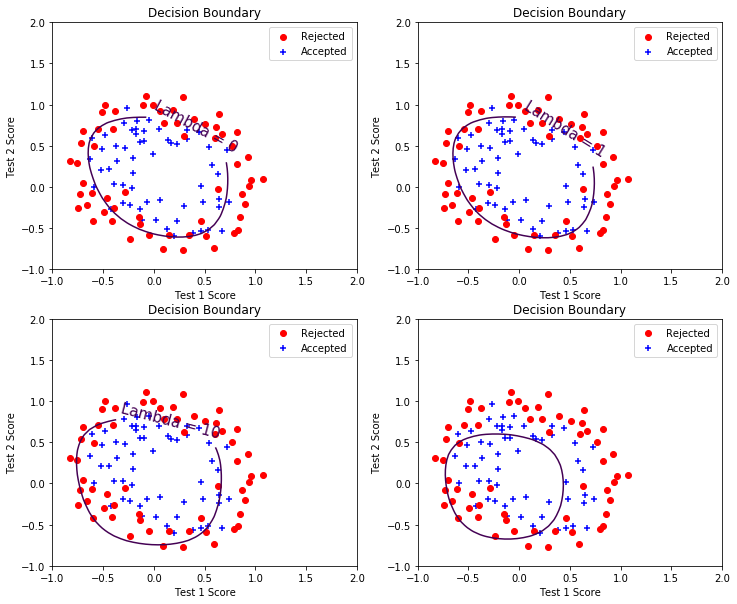

In [13]:
pyplot.figure(figsize=(12,10))
pyplot.subplot(221)
plotData()
Theta = gradientDescent(X_e,Y,iterations,learning_rate,Theta,0.)
plotBoundary(Theta,0.)

pyplot.subplot(222)
plotData()
Theta = gradientDescent(X_e,Y,iterations,learning_rate,Theta,1.)
plotBoundary(Theta,1.)

pyplot.subplot(223)
plotData()
Theta = gradientDescent(X_e,Y,iterations,learning_rate,Theta,10.)
plotBoundary(Theta,10.)

pyplot.subplot(224)
plotData()
Theta = gradientDescent(X_e,Y,iterations,learning_rate,Theta,100.)
plotBoundary(Theta,100.)

pyplot.show()